In [108]:
# Use seaborn for pairplot
!pip install -q seaborn

In [304]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from keras.datasets import boston_housing
from keras import models
from keras import layers
from tensorflow.keras import activations
from google.colab import files
import seaborn as sns

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

print(tf.__version__)

2.5.0


In [195]:
uploaded = files.upload()

Saving ddataset.csv to ddataset (3).csv


In [331]:
path = io.StringIO(uploaded["ddataset.csv"].decode('utf-8'))
df = pd.read_csv(path, sep=';')
dataset = df.copy()
df.tail()

,time,dx,D,teta,alpha_gn,alpha_ln,ugn,uln,rho_gn,rho_ln,p
88995,60.057647,1104.0,0.205,-1.570796,0,1.0,0.0,0.705041,6.882514,1200.296812,843283.1576
88996,60.057647,1115.5,0.205,-1.570796,0,1.0,0.0,0.705080,5.635172,1200.230848,707451.2416
88997,60.057647,1127.0,0.205,-1.570796,0,1.0,0.0,0.705119,4.387897,1200.164887,571626.7434
88998,60.057647,1138.5,0.205,-1.570796,0,1.0,0.0,0.705158,3.140691,1200.098930,435809.6629
88999,60.057647,1150.0,0.205,-1.570796,0,1.0,0.0,0.705196,1.893552,1200.032976,300000.0000


In [382]:
#dataset.isna().sum()
dataset = dataset.dropna()

In [383]:
X_train = dataset.sample(frac=0.8, random_state=0)
X_test = dataset.drop(X_train.index)

In [288]:
#sns.pairplot(X_train[['p','time','dx','D','teta','uln','rho_gn','rho_ln']], diag_kind='kde')

In [384]:
X_train.describe().transpose()[['mean', 'std']]

,mean,std
time,2.571097e+01,1.847389e+01
dx,5.806726e+02,3.314201e+02
D,2.050000e-01,6.639180e-14
teta,-1.570796e+00,2.184934e-12
alpha_gn,0.000000e+00,0.000000e+00
alpha_ln,1.000000e+00,1.205869e-08
ugn,7.062489e-03,7.002345e-02
uln,6.894941e-01,1.259346e+00
rho_gn,6.427752e+01,3.934887e+01
rho_ln,1.203332e+03,2.080925e+00


In [385]:
y_train = X_train.pop('p')
y_test = X_test.pop('p')

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((71200, 10), (71200,), (17800, 10), (17800,))

In [386]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(X_train)
X_train = normalizer(X_train)
normalizer.mean.numpy()

array([  25.711,  580.672,    0.205,   -1.571,    0.   ,    1.   ,
          0.007,    0.689,   64.278, 1203.332], dtype=float32)

In [387]:
def loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

In [389]:
model = models.Sequential()
model.add(layers.Dense(20, activation=activations.tanh, input_shape=(X_train.shape[1],)))
model.add(layers.Dense(20, activation=activations.tanh))
model.add(layers.Dense(1))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss=loss_fn, metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=80, batch_size=16, verbose=1, validation_split = 0.2)

Epoch 1/80
3560/3560 [==============================] - 6s 1ms/step - loss: 68657987896607.2734 - mae: 7094094.5545 - val_loss: 68616502378496.0000 - val_mae: 7082664.0000
Epoch 2/80
3560/3560 [==============================] - 6s 2ms/step - loss: 68312925895185.6875 - mae: 7067388.9794 - val_loss: 68511921602560.0000 - val_mae: 7075276.0000
Epoch 3/80
3560/3560 [==============================] - 5s 1ms/step - loss: 68058450185360.0703 - mae: 7058156.4063 - val_loss: 68407361798144.0000 - val_mae: 7067890.0000
Epoch 4/80
3560/3560 [==============================] - 6s 2ms/step - loss: 68154742334620.1484 - mae: 7061325.6525 - val_loss: 68303028486144.0000 - val_mae: 7060511.5000
Epoch 5/80
3560/3560 [==============================] - 5s 1ms/step - loss: 67842488906994.4141 - mae: 7047410.1466 - val_loss: 68198644842496.0000 - val_mae: 7053105.5000
Epoch 6/80
3560/3560 [==============================] - 6s 2ms/step - loss: 67661114130316.9766 - mae: 7028755.5601 - val_loss: 680943786393

In [376]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
75,6.786400e+13,7038824.5,6.792793e+13,7033894.5,75
76,6.785340e+13,7038079.5,6.791748e+13,7033144.5,76
77,6.784304e+13,7037340.5,6.790713e+13,7032411.0,77
78,6.783270e+13,7036615.0,6.789666e+13,7031661.5,78
79,6.782232e+13,7035885.0,6.788632e+13,7030926.5,79


In [377]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [p]')
  plt.legend()
  plt.grid(True)

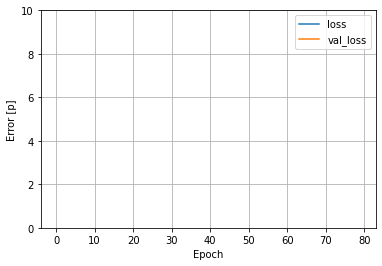

In [378]:
plot_loss(history)

In [381]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test, verbose=0)
test_mae_score

7118778.5